In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename='D:\DSML\clustering\kmeans\housing\\housing.csv'
data=pd.read_csv(filename)
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


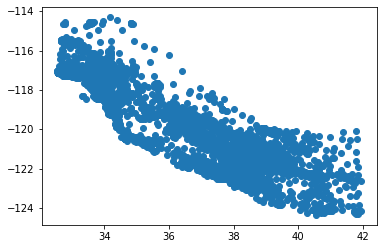

In [4]:
data=data.loc[:,['latitude','longitude']]
plt.scatter(data.latitude, data.longitude)

In [5]:
data=np.array(data)

In [8]:
K=5
m=3

U=np.random.rand(data.shape[0],K)
U/=np.sum(U, axis=1)[:,np.newaxis]
U

array([[0.30572131, 0.16717423, 0.18481803, 0.33808592, 0.00420051],
       [0.16171807, 0.08438475, 0.40134708, 0.33039688, 0.02215322],
       [0.30275416, 0.08504649, 0.2487819 , 0.09806553, 0.26535193],
       ...,
       [0.0549416 , 0.2451338 , 0.14636311, 0.28147361, 0.27208788],
       [0.32156338, 0.00367986, 0.32256953, 0.188328  , 0.16385922],
       [0.05025235, 0.03269823, 0.42411217, 0.32590529, 0.16703197]])

In [13]:
def calculate_centroid (data, K, U, m):
    Centroids=np.zeros((K,data.shape[1]))
    for i in range (K):
        Centroids[i,:]=np.sum((U[:,i]**m)[:,np.newaxis]*data, axis=0)/np.sum(U[:,i]**m)
    return Centroids

In [23]:
def calculate_membership (data, Centroids, K , m):
    U_new=np.zeros((data.shape[0],K))
    for i in range (K):
        U_new[:,i]=np.linalg.norm(data-Centroids[i,:],axis=1)

    U_new=1/ (U_new ** (2/(m-1)) * np.sum((1/U_new) ** (2/(m-1)) , axis=1 )[:,np.newaxis] )
    return U_new

In [19]:
labels=np.argmax(U_new, axis=1)
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

<AxesSubplot:>

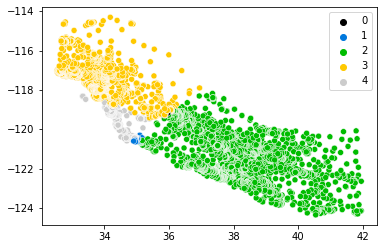

In [21]:
sns.scatterplot(data=data, x=data[:,0],y=data[:,1], hue=labels, palette='nipy_spectral')

In [24]:
max_iteration=100
for iteration in range (max_iteration):
    Centroids=calculate_centroid(data, 5, U , 3)
    U_new= calculate_membership (data,Centroids, 5 , 3 )
    
    
    
    if np.linalg.norm (U_new- U)<=0.00001:
        break
    U=U_new
    
    labels=np.argmax(U_new, axis=1)

<AxesSubplot:>

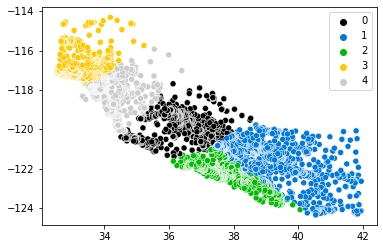

In [25]:
sns.scatterplot(data=data, x=data[:,0],y=data[:,1], hue=labels, palette='nipy_spectral')